# How to solve a maze or labyrinth using Python
Link to YouTube which examples everything:https://youtu.be/1KHgCRs-x1M  
Source of image: https://en.wikipedia.org/wiki/Maze#/media/File:Circularmazeexample.jpg  
Source of image: https://en.wikipedia.org/wiki/Maze-solving_algorithm#/media/File:MAZE_40x20_DFS_no_deadends.png  
The general approach taken here: https://en.wikipedia.org/wiki/Breadth-first_search  

In [68]:
import matplotlib.pylab as plt # I use version 3.1.2
#Notes for installing skimage: https://scikit-image.org/docs/dev/install.html
from skimage.morphology import skeletonize # I use version 0.16.2
import numpy as np # I use version 1.18.1

### Import of images and definition of start and end points

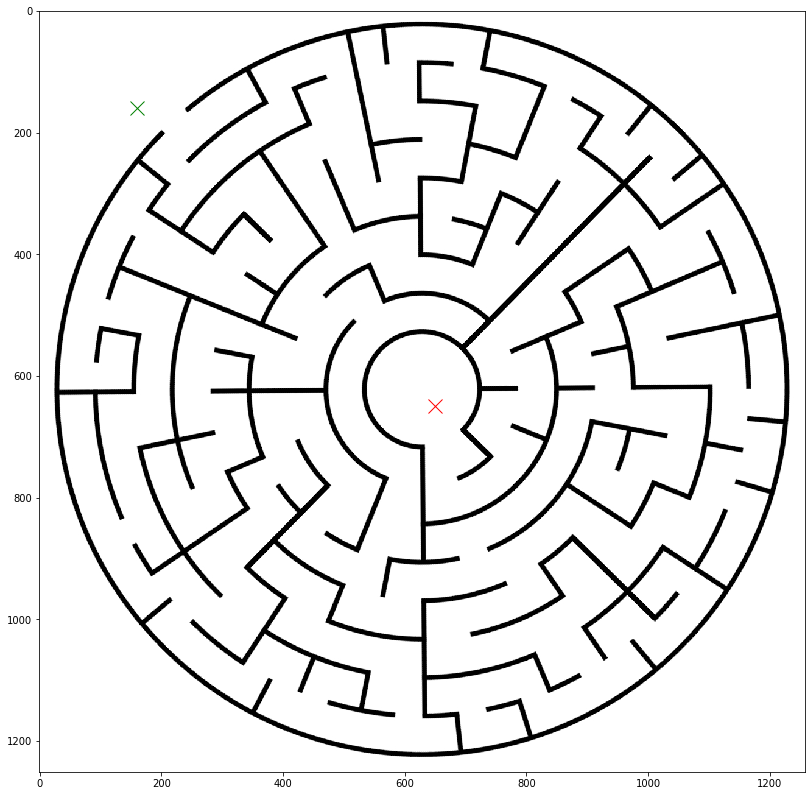

In [51]:
img_name = 'Circularmazeexample.jpeg'
rgb_img = plt.imread(img_name)

plt.figure(figsize=(14,14))
plt.imshow(rgb_img)
x0,y0 = 160, 160 #start x point
x1,y1 = 650, 650 #start y point

plt.plot(x0,y0, 'gx', markersize = 14)
plt.plot(x1,y1, 'rx', markersize = 14)

#img_name = 'MAZE_40x20_DFS_no_deadends.png'
#rgb_img = plt.imread(img_name)

#plt.figure(figsize=(14,14))
#plt.imshow(rgb_img)
#x0,y0 = 10, 20 #start x point
#x1,y1 = 960, 460 #start y point

#plt.plot(x0,y0, 'gx', markersize = 14)
#plt.plot(x1,y1, 'rx', markersize = 14)

### Skeleton path of image calculation

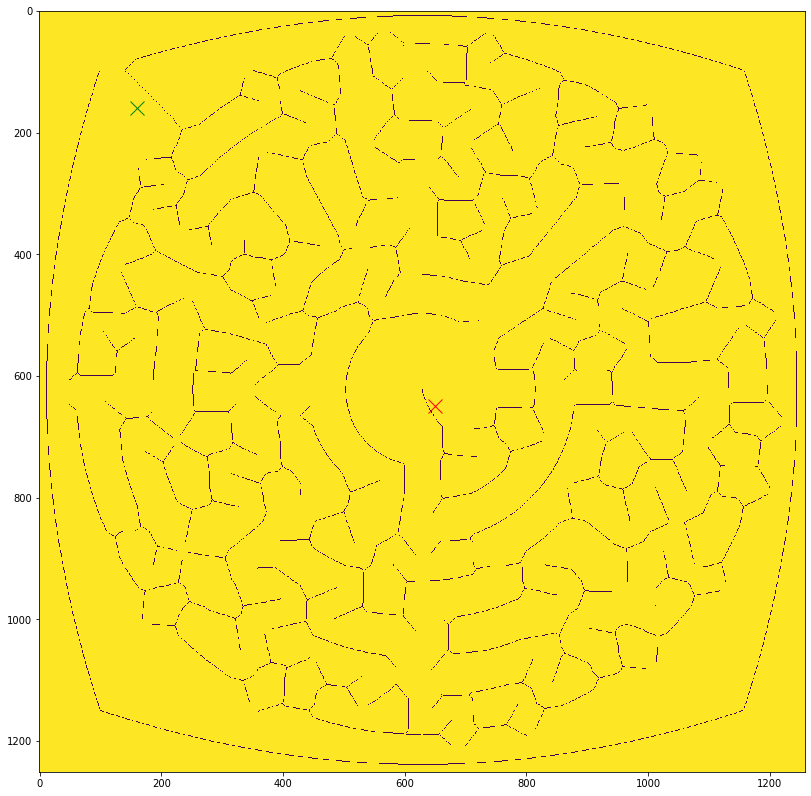

In [52]:
if rgb_img.shape.__len__()>2:
    thr_img = rgb_img[:,:,0] > np.max(rgb_img[:,:,0])/2
else:
    thr_img = rgb_img > np.max(rgb_img)/2
skeleton = skeletonize(thr_img)
plt.figure(figsize=(14,14))
plt.imshow(skeleton)
#map of routes.
mapT = ~skeleton
plt.imshow(mapT)
plt.plot(x0,x0, 'gx', markersize=14)
plt.plot(x1,y1, 'rx', markersize=14)


### Breadth first search algorithm

Optimum route found.


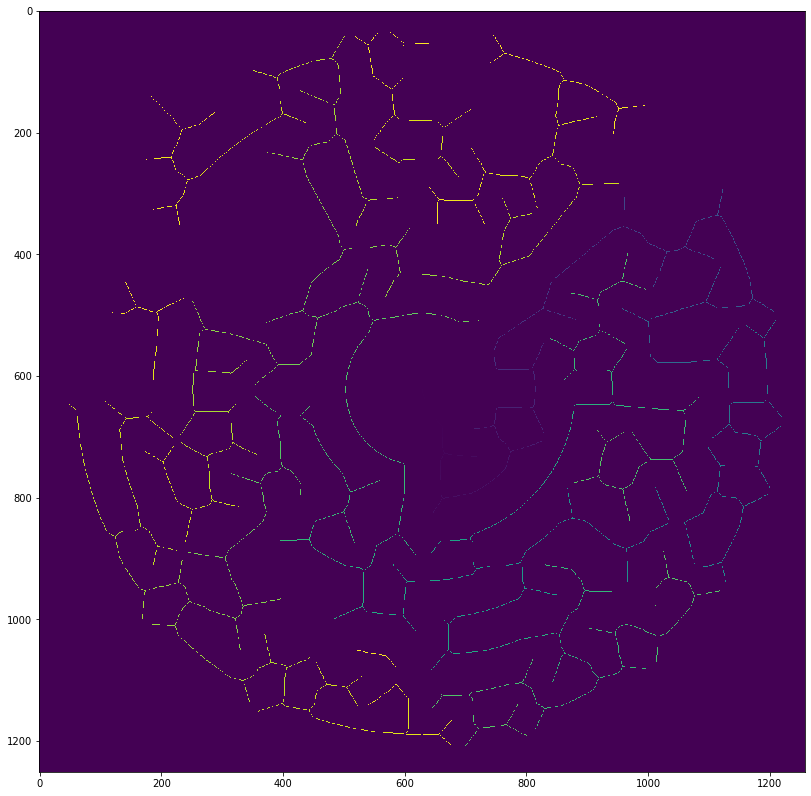

In [48]:

_mapt = np.copy(mapT)

#searching for our end point and connect to the path.
boxr = 30

#Just a little safety check, if the points are too near the edge, it will error.
if y1 < boxr: y1 = boxr
if x1 < boxr: x1 = boxr

cpys, cpxs = np.where(_mapt[y1-boxr:y1+boxr, x1-boxr:x1+boxr]==0)
#calibrate points to main scale.
cpys += y1-boxr
cpxs += x1-boxr
#find clooset point of possible path end points
idx = np.argmin(np.sqrt((cpys-y1)**2 + (cpxs-x1)**2))
y, x = cpys[idx], cpxs[idx]

pts_x = [x]
pts_y = [y]
pts_c = [0]

#mesh of displacements.
xmesh, ymesh = np.meshgrid(np.arange(-1,2),np.arange(-1,2))
ymesh = ymesh.reshape(-1)
xmesh = xmesh.reshape(-1)

dst = np.zeros((thr_img.shape))
               
#Breath first algorithm exploring a tree
while(True):
    #update distance.
    idc = np.argmin(pts_c)
    ct = pts_c.pop(idc)
    x = pts_x.pop(idc)
    y = pts_y.pop(idc)
    #Search 3x3 neighbourhood for possible
    ys,xs = np.where(_mapt[y-1:y+2,x-1:x+2] == 0)
    #Invalidate these point from future searchers.
    _mapt[ys+y-1, xs+x-1] = ct
    _mapt[y,x] = 9999999
    #set the distance in the distance image.
    dst[ys+y-1,xs+x-1] = ct+1
    #extend our list.s
    pts_x.extend(xs+x-1)
    pts_y.extend(ys+y-1)
    pts_c.extend([ct+1]*xs.shape[0])
    #If we run of points.
    if pts_x == []:
        break
    if np.sqrt((x-x0)**2 + (y-y0)**2) <boxr:
        edx = x
        edy = y
        break
plt.figure(figsize=(14,14))
plt.imshow(dst)

path_x = []
path_y = []

y = edy
x = edx
#Traces best path
while(True):
    nbh = dst[y-1:y+2,x-1:x+2]
    nbh[1,1] = 9999999
    nbh[nbh==0] = 9999999
    #If we reach a deadend
    if np.min(nbh) == 9999999:
        break
    idx = np.argmin(nbh)
    #find direction
    y += ymesh[idx]
    x += xmesh[idx]
    
    if np.sqrt((x-x1)**2 + (y-y1)**2) < boxr:
        print('Optimum route found.')
        break
    path_y.append(y)
    path_x.append(x)
    


### The moment of truth

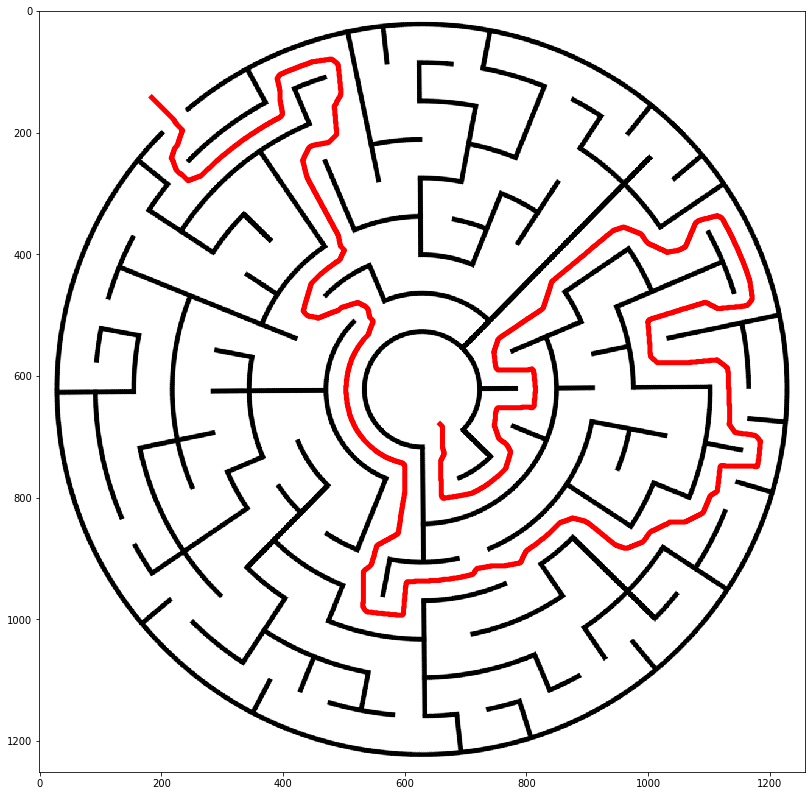

In [54]:
plt.figure(figsize=(14,14))
plt.imshow(rgb_img)
plt.plot(path_x,path_y, 'r-', linewidth=5)